In [48]:
import numpy as np
import pylab as plt
%matplotlib inline
from scipy.optimize import curve_fit

In [49]:
halflife_A = 10
halflife_B = 40
decay_const_A = np.log(2)/halflife_A
decay_const_B = np.log(2)/halflife_B
act_A_0 = 1000
act_B_0 = 500

In [50]:
t = np.arange(0,120,0.1)
act_A = act_A_0 * np.exp(-decay_const_A*t)
act_B = act_B_0 * np.exp(-decay_const_B*t)
total_act = act_A + act_B

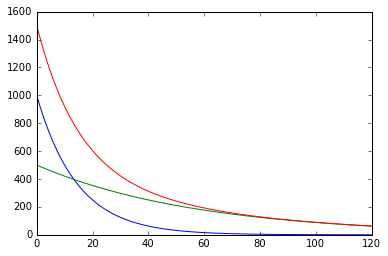

In [51]:
plt.plot(t,act_A,t,act_B,t,total_act)
plt.show()

In [52]:
total_act_meas = total_act * (1 + 0.3 * (np.random.random_sample(t.size) - 0.5))
total_act_meas_2 = total_act_meas[::5]
total_act_meas_normal = total_act * np.random.normal(1,0.1,t.size)

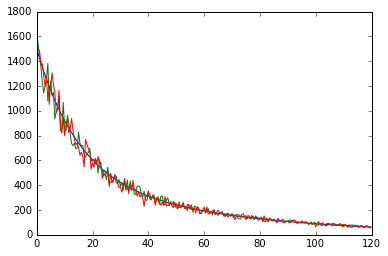

In [53]:
plt.plot(t,total_act,t[::5],total_act_meas_2,t[::5],total_act_meas_normal[::5])
plt.show()

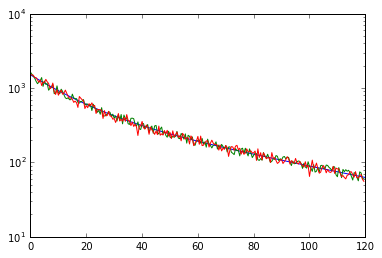

In [54]:
plt.semilogy(t,total_act,t[::5],total_act_meas_2,t[::5],total_act_meas_normal[::5])
plt.show()

In [55]:
def single_isotope_decay(t,A,c):
    return A*np.exp(-c*t)

In [59]:
popt, pcov = curve_fit(single_isotope_decay,t[::5],total_act_meas_normal[::5])

/userspace/w/wilsonp/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
/userspace/w/wilsonp/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app


In [60]:
popt

array([  1.35520190e+03,   3.60300012e-02])

In [61]:
pcov

array([[  2.72664849e+02,   7.29701669e-03],
       [  7.29701669e-03,   3.95687104e-07]])

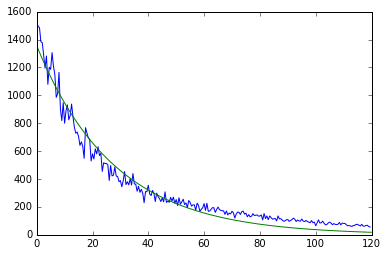

In [62]:
plt.plot(t[::5],total_act_meas_normal[::5],t,single_isotope_decay(t,popt[0],popt[1]))

In [64]:
def double_isotope_decay(t,A,c1,B,c2):
    return A*np.exp(-c1*t) + B*np.exp(-c2*t)

In [65]:
popt2, pcov2 = curve_fit(double_isotope_decay,t[::5],total_act_meas_normal[::5])

/userspace/w/wilsonp/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [69]:
np.log(2)/popt2[[1,3]]

array([ 41.13044256,   9.67199667])

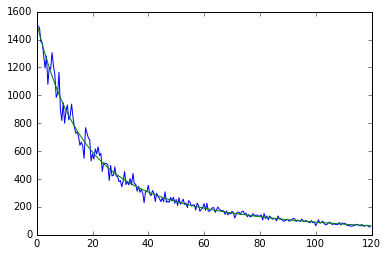

In [77]:
plt.plot(t[::5],total_act_meas_normal[::5],t,double_isotope_decay(t,popt2[0],popt2[1],popt2[2],popt2[3]))
plt.show()

In [79]:
log_meas = np.log(total_act_meas_normal)
def line(t,m,b):
    return m*t+b
poptB,pcovB = curve_fit(line,t[2*t.size/3::5],log_meas[2*t.size/3::5])

/userspace/w/wilsonp/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [82]:
log_meas_A = log_meas - line(t,poptB[0],poptB[1])
poptA,pcovA = curve_fit(line,t[::5],log_meas_A[::5])

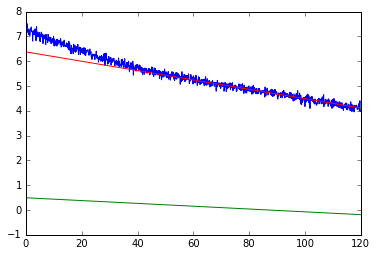

In [83]:
plt.plot(t,log_meas,t,line(t,poptA[0],poptA[1]),t,line(t,poptB[0],poptB[1]))